In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

df= pd.read_csv('TED_TALKS_data.csv').drop(columns =['link'])
df


,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72
...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000
5438,Simplicity sells,David Pogue,February 2006,2000000,60000


# Separando o ano da coluna 'date':

In [105]:
anos = []
for c in df['date']:
    anos.append(c.split(' ')[1])
anos = pd.DataFrame(anos, columns=['anos'])

#  Juntando os anos separados com o dataframe principal:

df = df.join(anos, lsuffix='anos')
df

,title,author,date,views,likes,anos
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,2022
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,2021
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,2006
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,2006
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,2006
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,2006


# Agrupando todos os anos (sem repetições) do dataframe principal

In [106]:
anossemrep = []
for c in df['anos']:
    if c not in anossemrep:
        anossemrep.append(c)
anossemrep = pd.DataFrame(anossemrep, columns = ['Ano']).sort_values(by="Ano", ascending=False).reset_index().drop(['index'], axis=1)


# ---------------------------------------------------------------------------------------------------------------

# - Quantidade de vídeos:

### Contagem por ano de quantos vídeos foram postados

In [107]:
contagemano= []
for c in anossemrep['Ano']:
    cont = 0
    for i in df['anos']:
        if c == i:
            cont += 1
    contagemano.append(cont)
contagemano = pd.DataFrame(contagemano)


### Data Frame do ano e da quantidade de vídeos por ano

In [108]:
anossemrep['Quantidade de Vídeos'] = contagemano
anossemrep


,Ano,Quantidade de Vídeos
0,2022,20
1,2021,390
2,2020,501
3,2019,544
4,2018,473
5,2017,495
6,2016,399
7,2015,377
8,2014,357
9,2013,388


### Plotando gráfico do ano x quantidade de vídeos

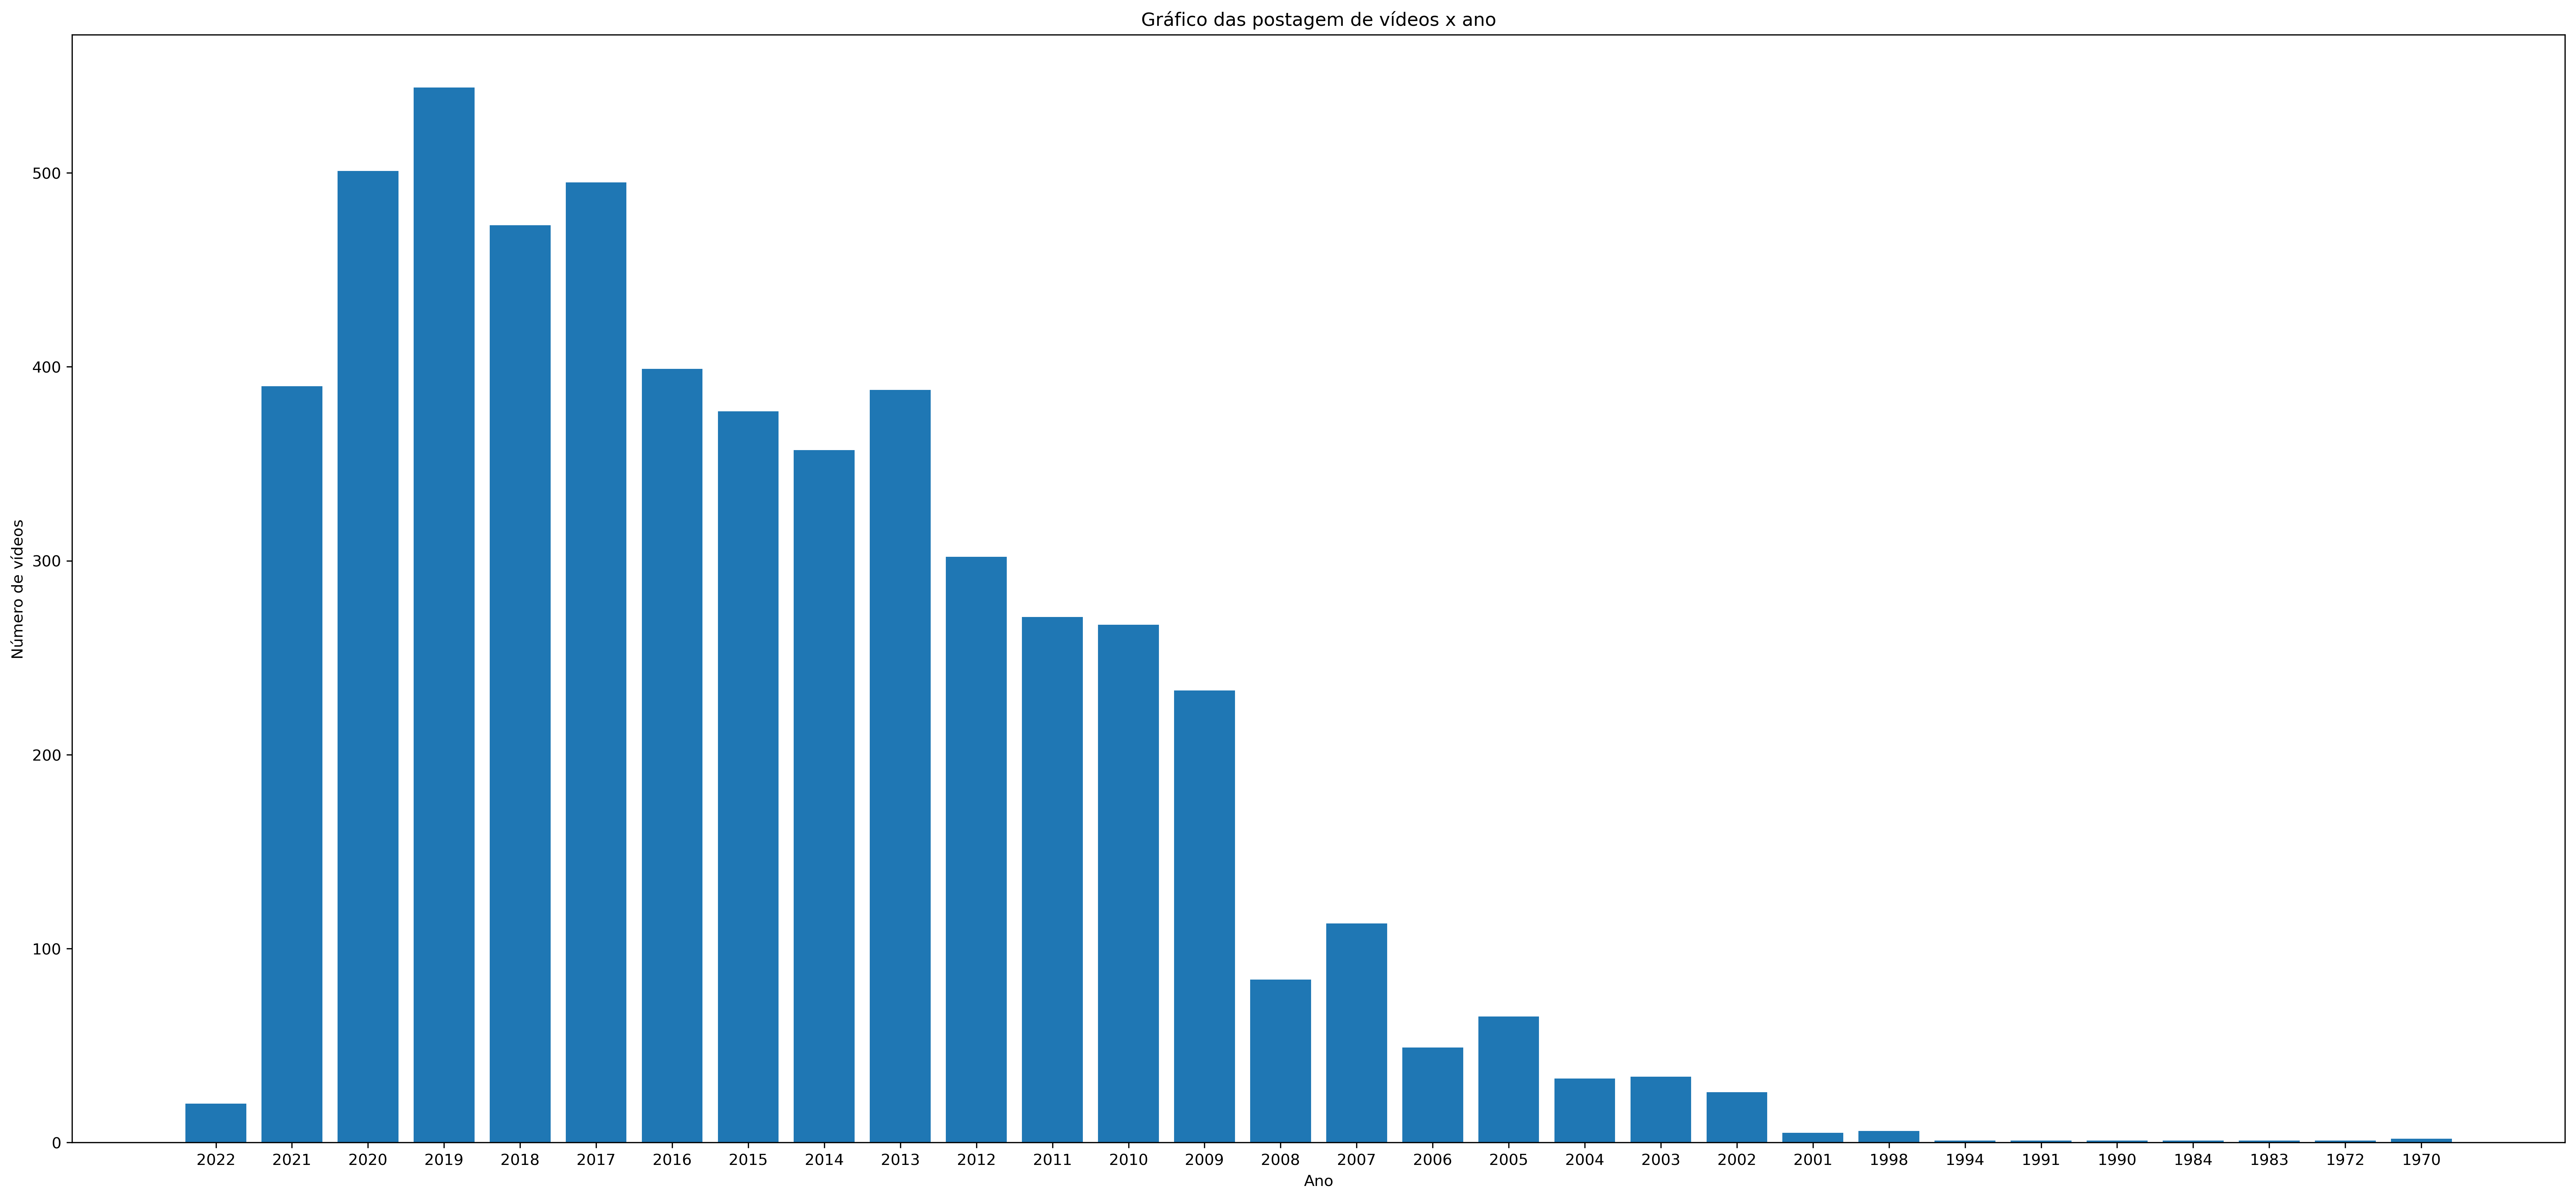

In [109]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],anossemrep['Quantidade de Vídeos'])
plt.xlabel('Ano')
plt.ylabel('Número de vídeos')
plt.title('Gráfico das postagem de vídeos x ano')
plt.show()

# - Quantidade de visualizações:

### Vizualizações por ano

In [110]:
viewyear= []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['views'][n]
    viewyear.append(total)
viewyear = pd.DataFrame(viewyear, columns=['Visualização']).reset_index().drop(columns=['index'])


In [111]:
# Data Frame dos anos, vídeos por ano e a quantidade de views por ano

anossemrep['Visualização'] = viewyear


### Plotando gráfico do total de views x ano

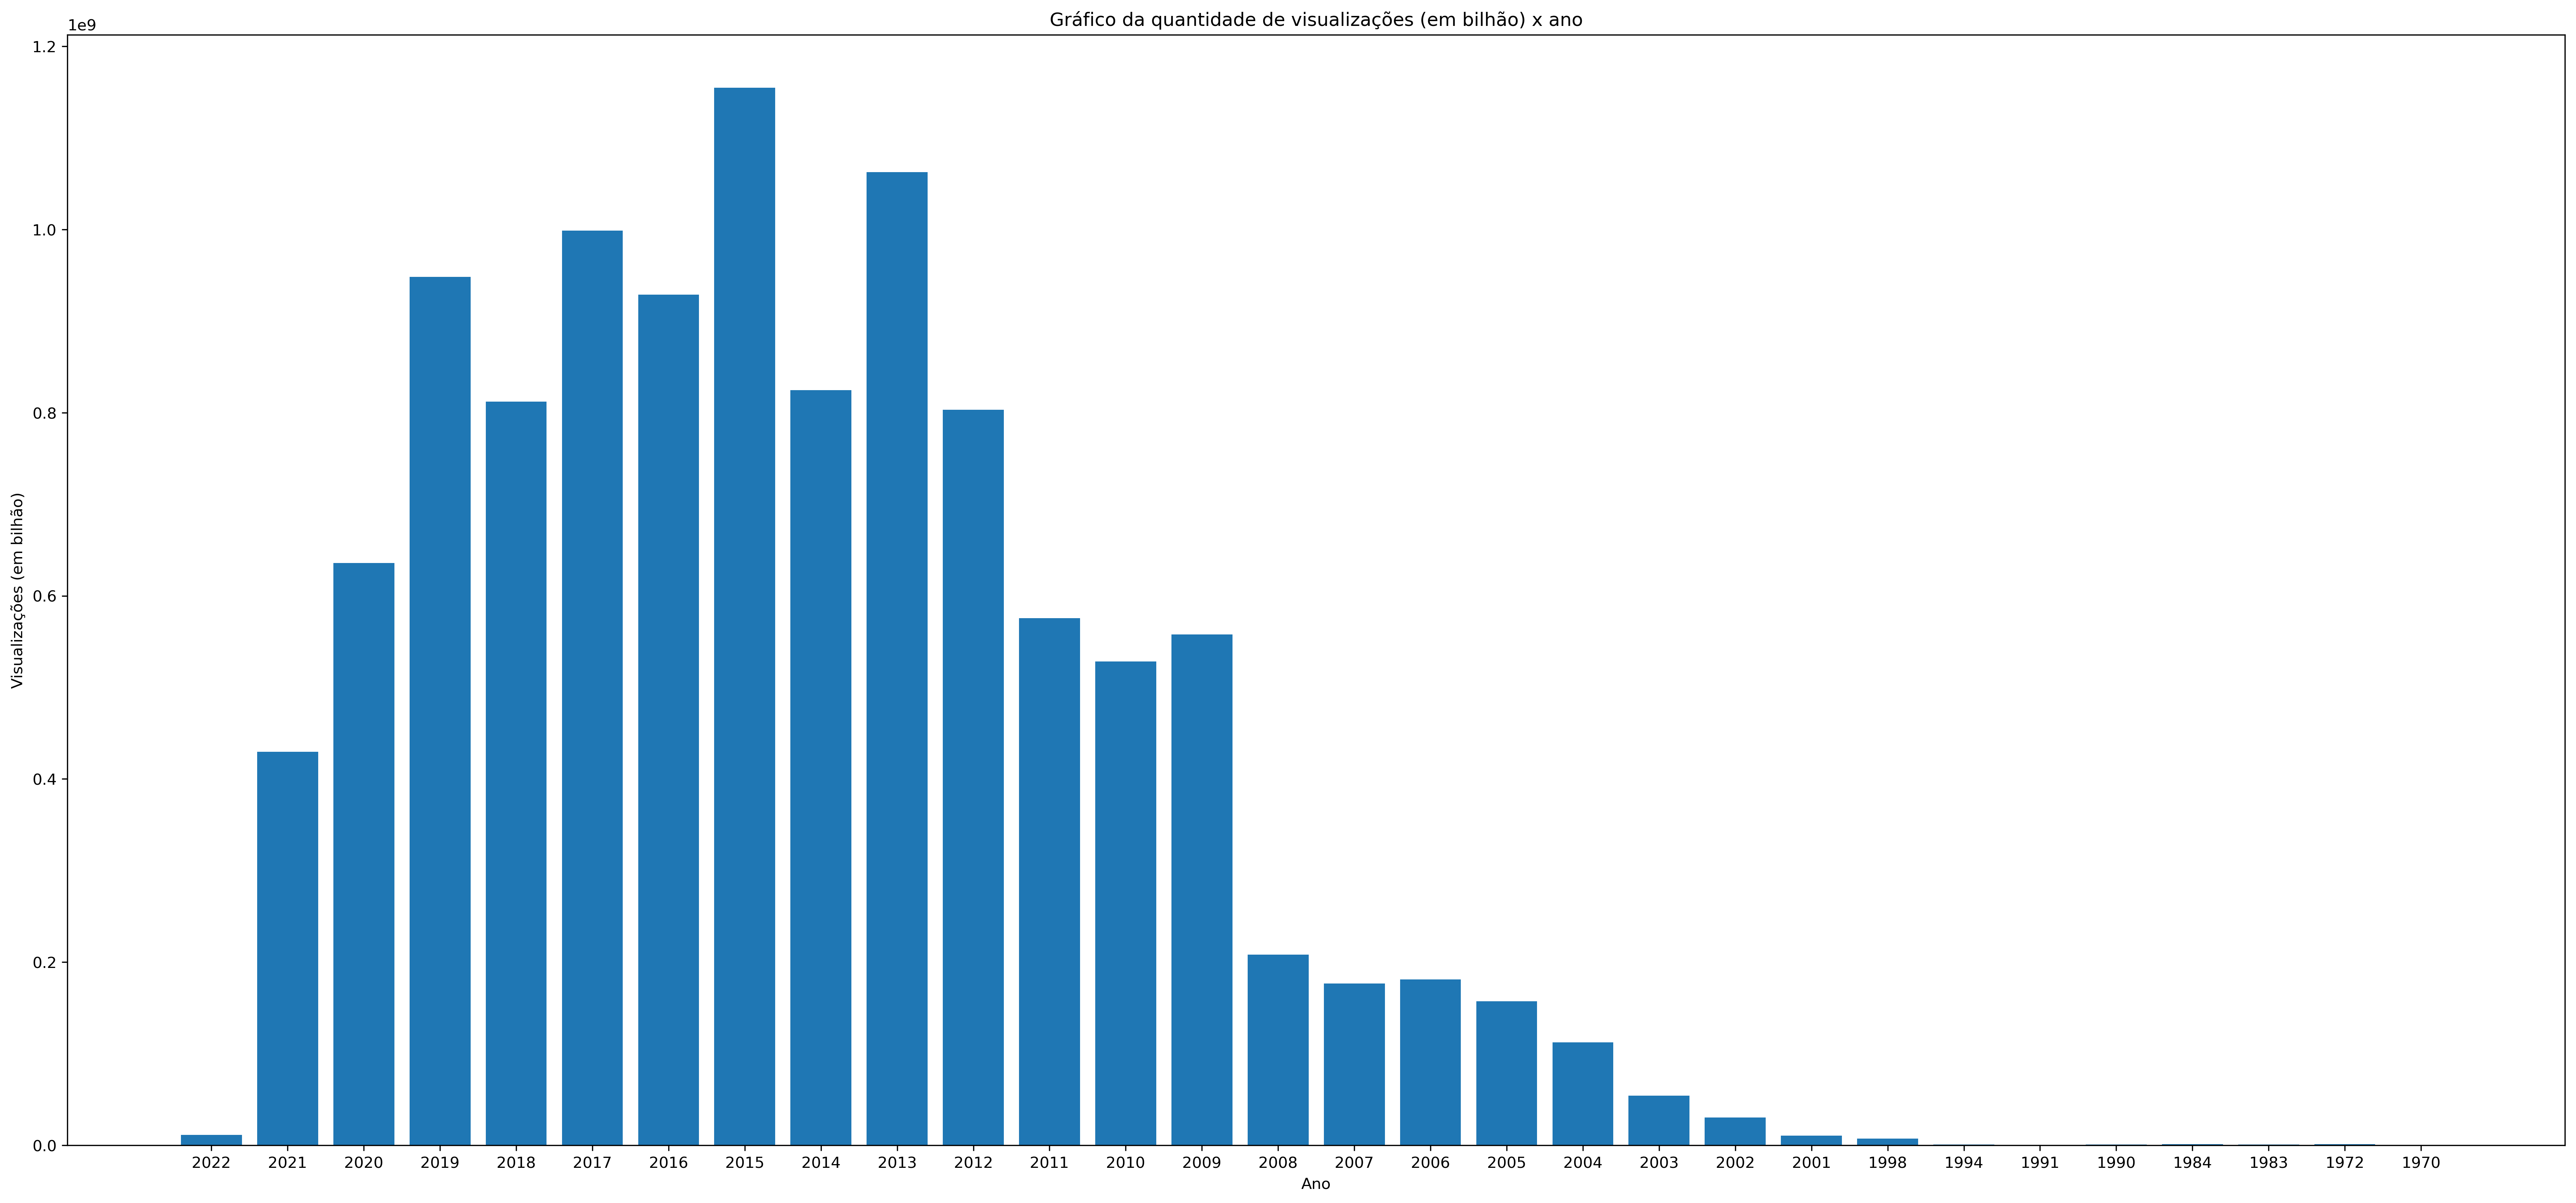

In [112]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],anossemrep['Visualização'])
plt.xlabel('Ano')
plt.ylabel('Visualizações (em bilhão)')
plt.title('Gráfico da quantidade de visualizações (em bilhão) x ano')
plt.show()

### Média de visualizações por ano:


In [113]:
media_views = pd.DataFrame(anossemrep['Visualização'] / anossemrep['Quantidade de Vídeos'], columns=['Média de visualização']).round(2)
media_views

,Média de visualização
0,573500.00
1,1101868.46
2,1269349.70
3,1742866.36
4,1716400.84
5,2017962.83
6,2328057.38
7,3062971.17
8,2309950.41
9,2738498.70


### Plotando gráfico da média de visualizações x ano

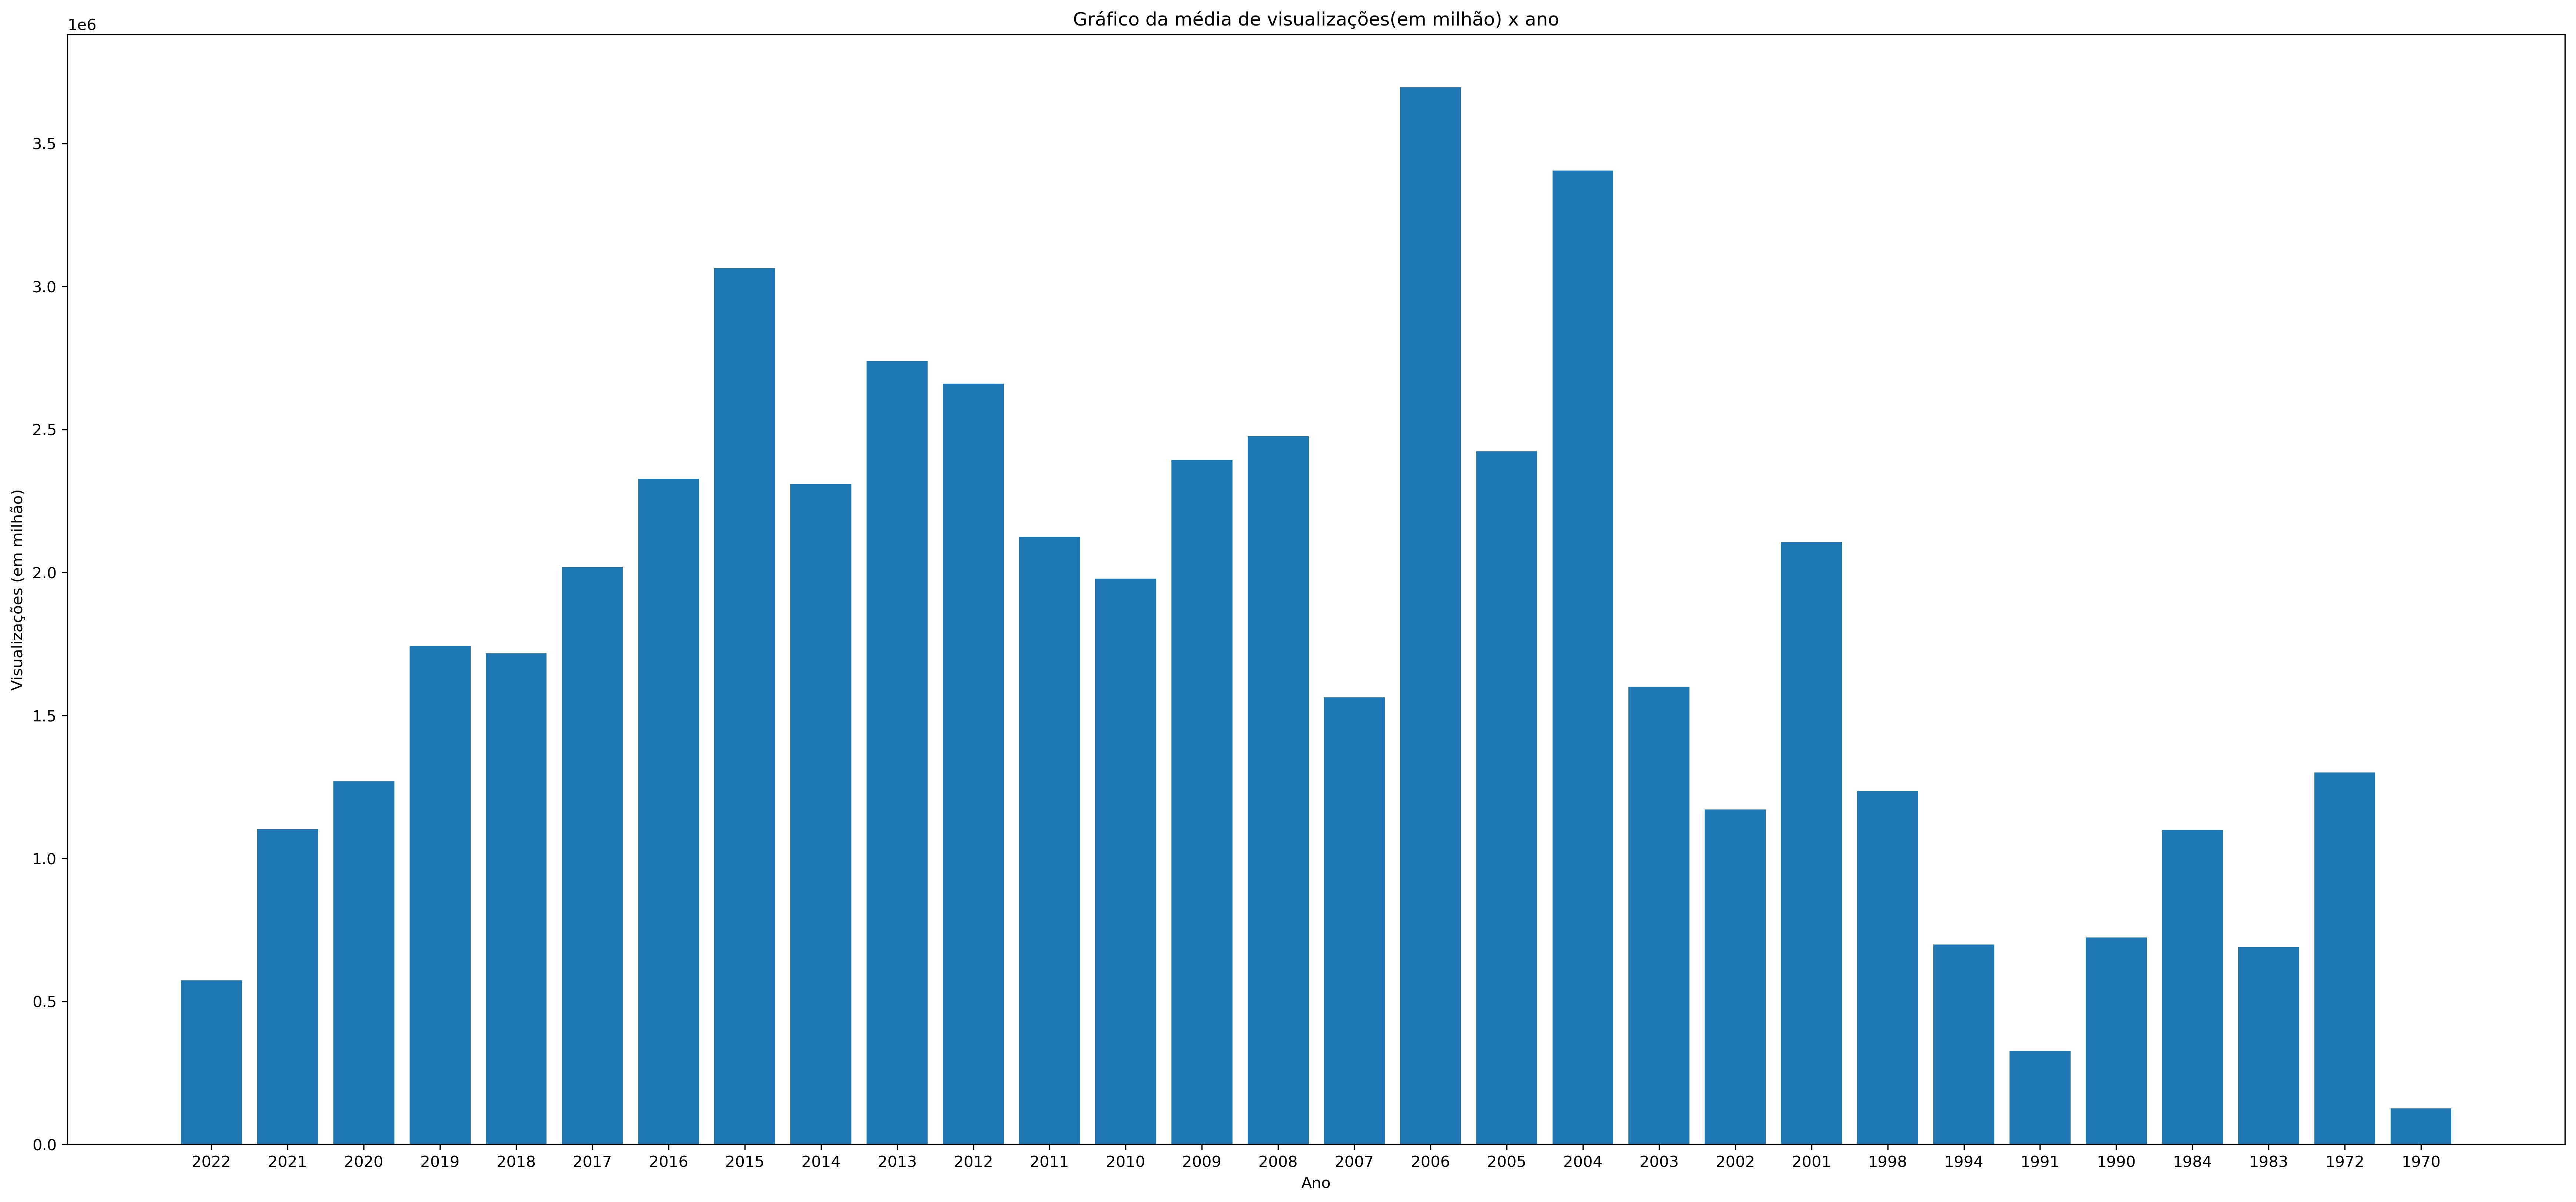

In [114]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],media_views['Média de visualização'])
plt.xlabel('Ano')
plt.ylabel('Visualizações (em milhão)')
plt.title('Gráfico da média de visualizações(em milhão) x ano')
plt.show()

# - Quantidade de likes: 

### Likes por ano

In [115]:
likes = []
for c in anossemrep['Ano']:
    total = 0
    for n ,i in enumerate(df['anos']):
        if c == i:
            total += df['likes'][n]
    likes.append(total)
likes = pd.DataFrame(likes, columns=['Likes']).reset_index().drop(columns=['index'])


In [116]:
# Data Frame dos anos, vídeos por ano, visualizações por ano e likes

anossemrep['Likes'] = likes



### Plotando gráfico do total de likes x ano

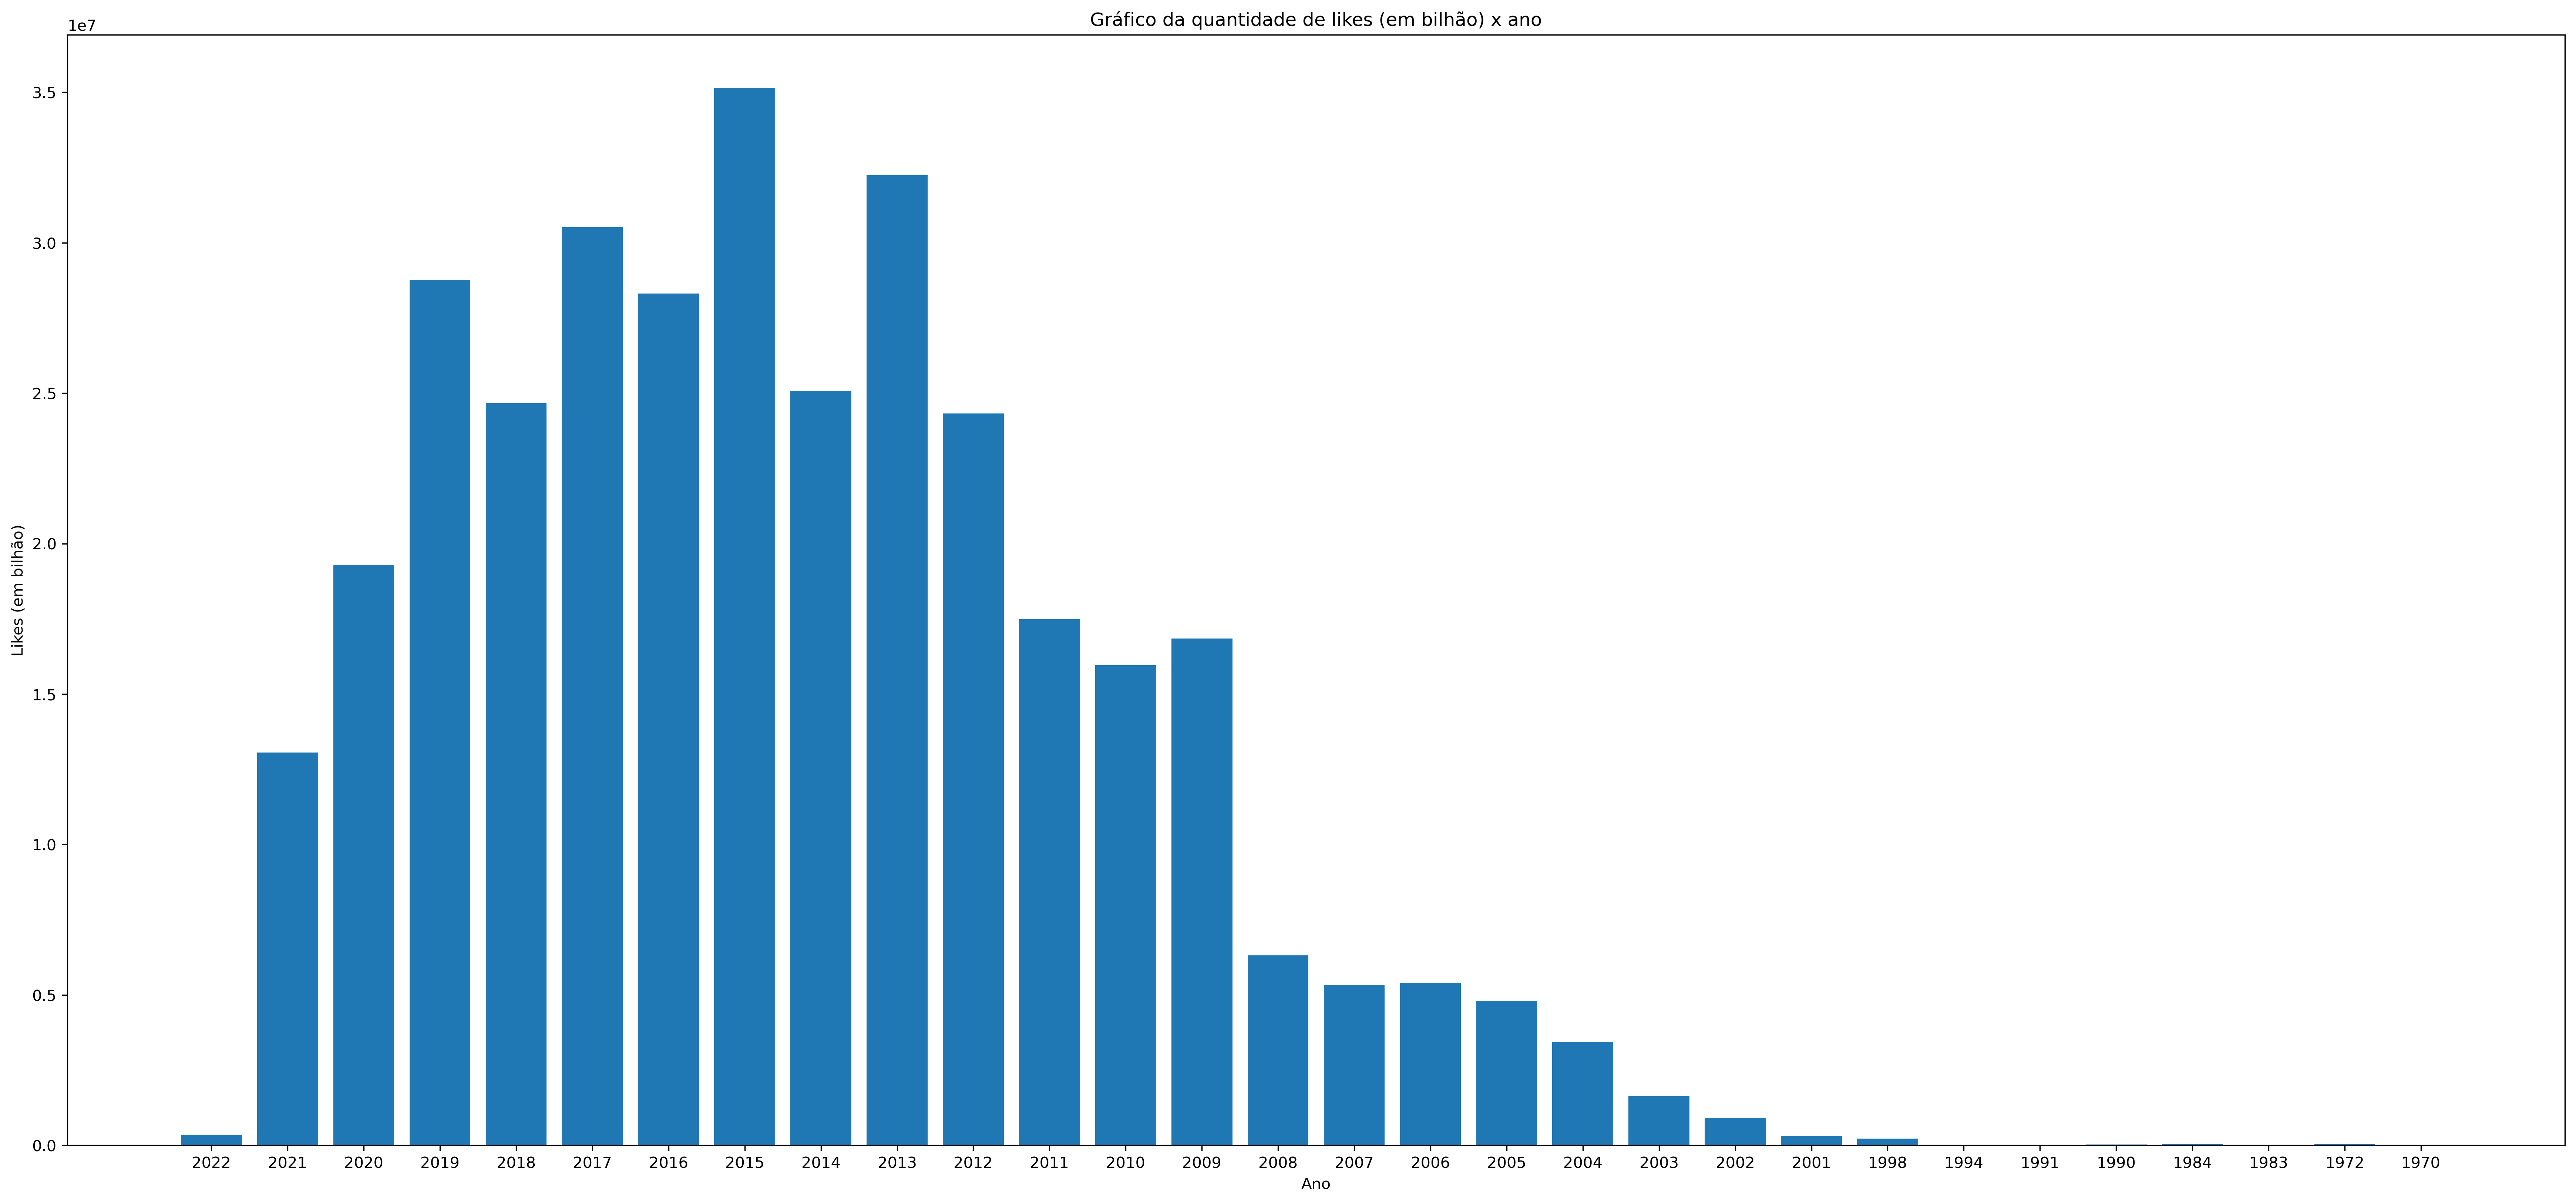

In [117]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],anossemrep['Likes'])
plt.xlabel('Ano')
plt.ylabel('Likes (em bilhão)')
plt.title('Gráfico da quantidade de likes (em bilhão) x ano')
plt.show()

### Média de likes por ano:

In [118]:
media_like = pd.DataFrame(anossemrep['Likes'] / anossemrep['Quantidade de Vídeos'], columns=['Média de likes']).round(2)


### Plotando gráfico da média de likes por vídeo x ano:


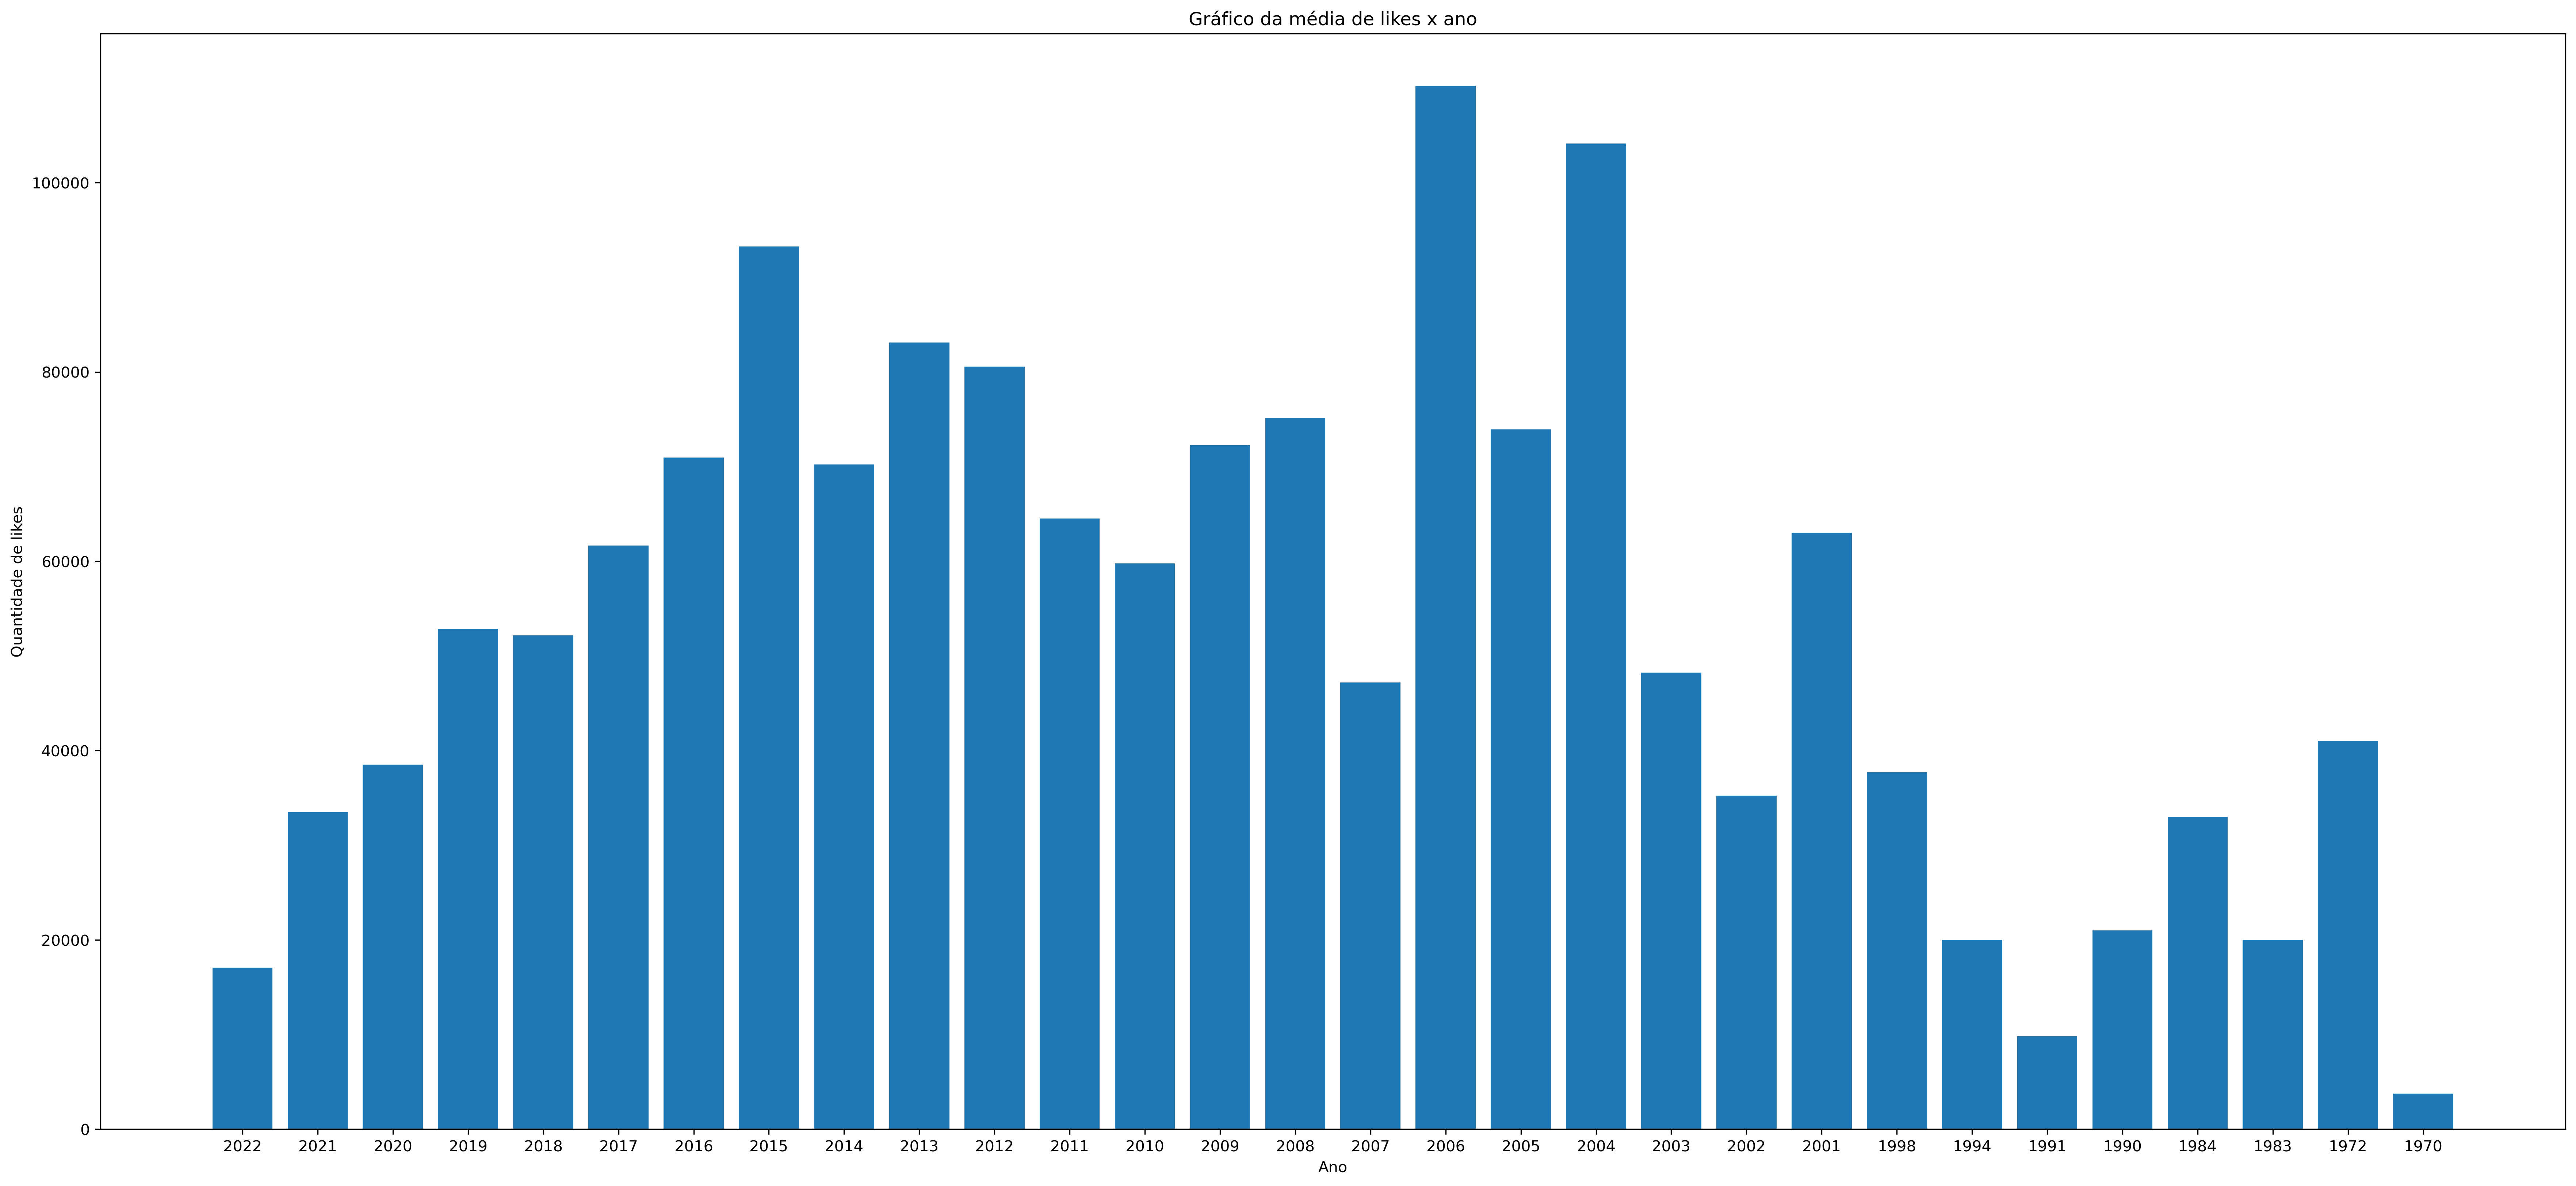

In [119]:
fig = plt.figure(figsize=(15, 10), dpi=300)
ax = fig.add_axes([1,1,1.5,1])
ax.bar(anossemrep['Ano'],media_like['Média de likes'])
plt.xlabel('Ano')
plt.ylabel('Quantidade de likes')
plt.title('Gráfico da média de likes x ano')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# Medidas de tendências:

In [120]:
anossemrep

,Ano,Quantidade de Vídeos,Visualização,Likes
0,2022,20,11470000,341254
1,2021,390,429728700,13058238
2,2020,501,635944200,19297014
3,2019,544,948119299,28764575
4,2018,473,811857597,24671493
5,2017,495,998891600,30516328
6,2016,399,928894896,28306782
7,2015,377,1154740130,35151761
8,2014,357,824652297,25076665
9,2013,388,1062537497,32249916


In [121]:
media_views['Média de visualização'].std()

905008.2052260309

<AxesSubplot:>

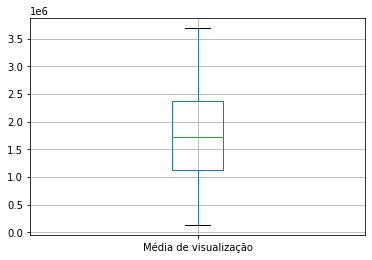

In [122]:
media_views.boxplot(column='Média de visualização')

<AxesSubplot:>

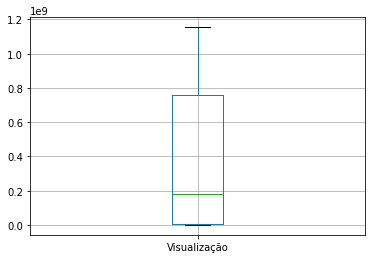

In [123]:
anossemrep.boxplot(column='Visualização')

In [124]:
media_like['Média de likes'].std()

27528.51228550029

<AxesSubplot:>

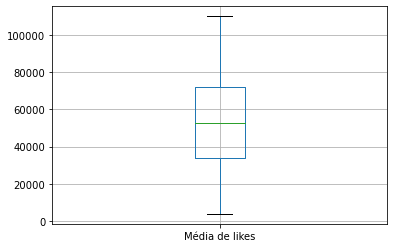

In [125]:
media_like.boxplot(column='Média de likes')

# Correlação entre vizualizações e likes por ano:

<AxesSubplot:xlabel='Visualização', ylabel='Likes'>

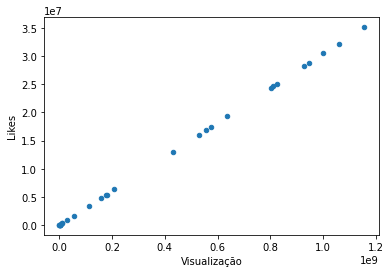

In [127]:
anossemrep.plot.scatter(x = 'Visualização', y= 'Likes')

In [128]:
anossemrep[['Likes', 'Visualização']].corr()

,Likes,Visualização
Likes,1.000000,0.999991
Visualização,0.999991,1.000000


# Correlação entre vizualizações e quantidade de vídeos por ano


<AxesSubplot:xlabel='Visualização', ylabel='Quantidade de Vídeos'>

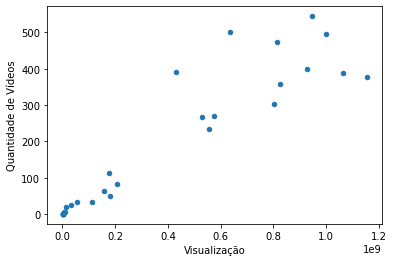

In [132]:
anossemrep.plot.scatter(x = 'Visualização', y=  'Quantidade de Vídeos')

In [133]:
anossemrep[['Quantidade de Vídeos', 'Visualização']].corr()

,Quantidade de Vídeos,Visualização
Quantidade de Vídeos,1.000000,0.930978
Visualização,0.930978,1.000000


# Correlação entre vídeos por ano e quantidade de likes

<AxesSubplot:xlabel='Quantidade de Vídeos', ylabel='Likes'>

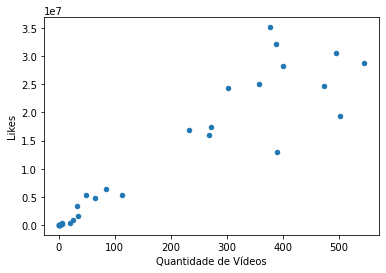

In [135]:
anossemrep.plot.scatter(x = 'Quantidade de Vídeos', y= 'Likes')

In [136]:
anossemrep[['Likes', 'Quantidade de Vídeos']].corr()

,Likes,Quantidade de Vídeos
Likes,1.000000,0.930925
Quantidade de Vídeos,0.930925,1.000000
